#### 1. Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#### 2. Load Dataset to Pandas DataFrame

In [7]:
df = pd.read_csv('datasets/bmx.csv')
# df.head()

# ເລືອກສະເພາະຄໍລັມທີ່ຕ້ອການ ແລ້ວທຳການລົບ missing value Nan ອອກ

df = df[['bmxleg', 'bmxwaist']].dropna()

df.info()
df

<class 'pandas.core.frame.DataFrame'>
Index: 6899 entries, 0 to 9337
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   bmxleg    6899 non-null   float64
 1   bmxwaist  6899 non-null   float64
dtypes: float64(2)
memory usage: 161.7 KB


,bmxleg,bmxwaist
0,40.2,81.0
2,40.3,64.6
3,40.5,80.1
4,42.1,86.7
5,31.0,59.8
...,...,...
9333,39.0,104.4
9334,39.4,79.0
9335,35.6,59.6
9336,32.9,106.6


#### 3. Create Model Object KMeanClustering

In [8]:
model = KMeans(n_clusters=4, random_state=0)


#### 4. Train Model

In [11]:
model.fit(df)

# get the centroids
centroids = model.cluster_centers_

print('Centroids:', centroids)

Centroids: [[ 38.72615054  85.03612903]
 [ 38.60022548 124.05377678]
 [ 38.88927614 102.1411975 ]
 [ 36.04064872  67.30131125]]


d:\PythonDABCEL\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


#### 5. Prediction

In [14]:
#ນຳຂໍ້ມູນແຕ່ລະຕຳແໜ່ງໄປທຳນາຍວ່າຢູ່ກຸ່ມໃດ

#ຊື່ງຈະໄດ້ຜົນລັບເປັນເປັນກຸ່ມຂໍ້ມູນຂອງແຕ່ລະຕຳແໜ່ງ
clusters = model.predict(df)

# ສະແດງຜົນ
print(clusters)

[0 3 0 ... 3 2 3]


#### 6. Plot Graph check Centroid

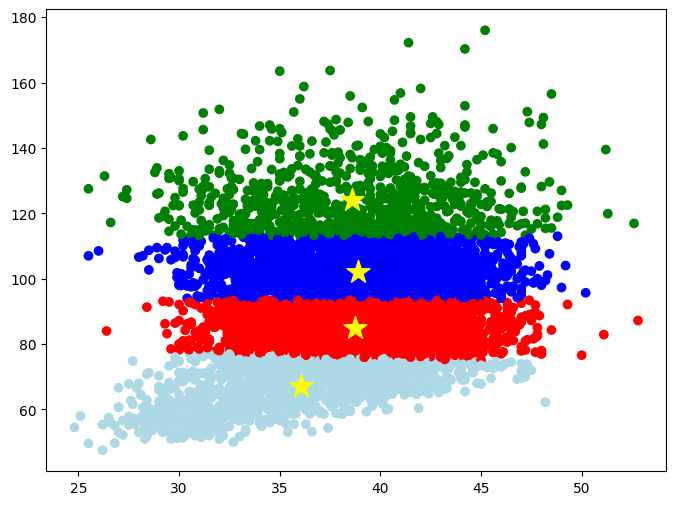

In [17]:
# ກຳນົດຊື່ຂອງແຕ່ລະກຸ່ມ (ຕາມຄ່າ K or n_clusters)
clusters_colors = ['red', 'green', 'blue', 'lightblue']

# ເກັບສີຂອງຂໍ້ມູນໃນແຕ່ລະຕຳແໜ່ງຕາມກຸ່ມຂອງມັນ
data_colors =[]

for i in clusters:
    data_colors.append(clusters_colors[i])

# ກຳນົດຂະໜາດຂອງແຕ່ລະກຸ່ມຂໍ້ມູນ
plt.figure(figsize=(8, 6))

# ວາດຕຳແໜ່ງຂໍ້ມູນ ໂດຍໃຫ້ແກນ x  ເປັນ bmxleg  ແລະ ແກນ y ເປັນ bmxwaist
plt.scatter(df['bmxleg'], df['bmxwaist'], color = data_colors)

# ວາດຕຳແໜ່ງ centroids ຂອງແຕ່ລະຕຳແໜ່ງ

plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='yellow')

# ສະແດງຜົນລັບ
plt.show()

# ຈາກລັກສະນະຂອງຈຸດ centroid ເຮົາອາດຈະໃຊ້ເປນແກນໃນການຜະລິດກາງແກງດັ່ງນີ້
# ກາງແກງທີ່ມີຂະໜາດ 124 ຊມ ຄວນມີຄວາມຍາວຂອງຂາສ່ວນເທິງ (uper leg ປະມານ 38,6)
#

#### 7. Export the model

In [18]:
from joblib import dump

# Save the model as pickle in a file
dump(model, 'bmx_kmean.ipynb.joblib')

['bmx_kmean.ipynb.joblib']